# Validation using DIGEST

Notebook to recreate the results presented in the paper. Keep in mind, that the results can slighty differentiate as the random background will not create the exact same random sets as before. 

## Setup

In [1]:
import os
import sys
import json
import pandas as pd
from IPython.display import IFrame
# ==== import DIGEST python package called biodigest ==== 
from biodigest.single_validation import single_validation, save_results
from biodigest.evaluation.d_utils.plotting_utils import create_plots,create_extended_plots

import warnings
warnings.filterwarnings("ignore")

If it is the first time that this package is used after installation, make sure that setup has been run before to have all required files.

In [2]:
from biodigest import setup
setup.main(setup_type="api")

[00:00:00|200.16MB] Starting Setup ...
[00:00:00|200.16MB] Get id and attribute mappings ...
[00:00:01|216.21MB] Get distance mappings ...
[00:00:01|216.21MB] Get distance mappings for jaccard ...
[00:00:19|219.49MB] Get distance mappings for overlap ...
[00:00:38|241.04MB] Finished Setup ...


## Clustering

Compare a target cluster of diseases or genes based on dunn index, sillhouette score or david bouldin index, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Set input parameters

#### Required input

In [3]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_gene_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "symbol"
mode = "clustering"

#### Optional input (Default parameters are set)

In [4]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_cluster/" 
verbose=True # printing additional information during the run
prefix="gene_cluster"

### Run script

In [5]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|241.04MB] Check for proper setup ...
[00:00:00|241.04MB] Starting validation ...
[00:00:00|241.04MB] Load mappings for input into cache ...
[00:00:02|657.60MB] Load distances for input into cache ...
[00:00:09|2454.59MB] Load input data ...
[00:00:09|2455.89MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:09|2458.22MB] Validation of random runs ...
[00:05:31|2459.61MB] Calculating p-values ...
[00:05:31|2459.61MB] Finished validation


### Inspect results

Check all P-values

In [6]:
pd.DataFrame(results["p_values"]['values'])

DI-based  SS-based  DBI-based
GO.BP  0.093906  0.150849   0.144855
GO.CC  0.820180  0.229770   0.238761
GO.MF  0.780220  0.299700   0.301698
KEGG   0.655345  0.368631   0.374625

Check validation values of input cluster

In [7]:
pd.DataFrame(results["input_values"]['values'])

DI-based  SS-based  DBI-based
GO.BP  0.989928  0.015676   0.982069
GO.CC  0.987647  0.076410   0.925316
GO.MF  0.981591  0.084761   0.919973
KEGG   0.978832  0.047343   0.959126

### Save results

#### Save full results as json and upper two tables as csv

In [8]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

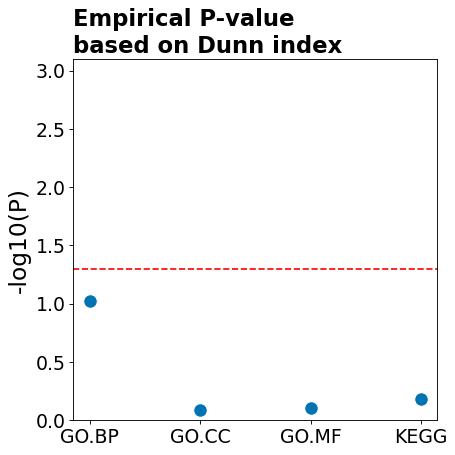

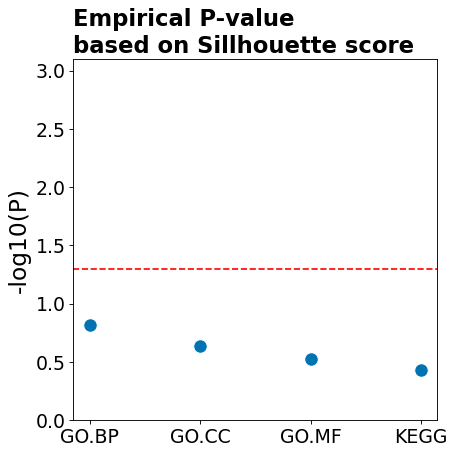

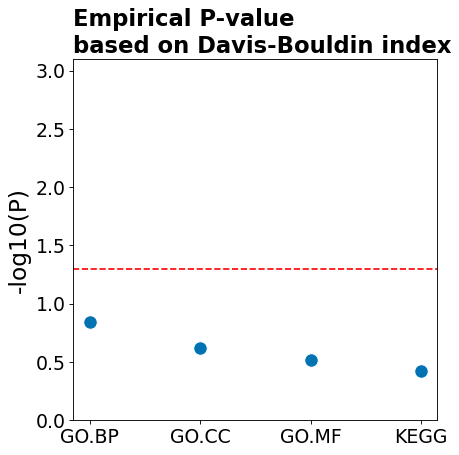

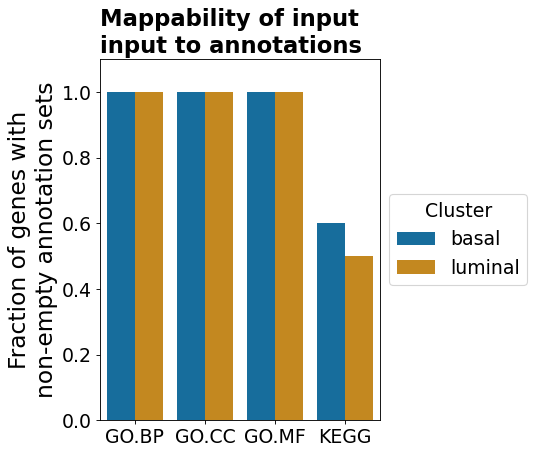

In [9]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Extended plots can show more information about the p-values with distribution plots of the relevance scores of the random runs, and about the mappability with distribution plots showing the number of assigned terms per ID and a sankey plot linking the top 10 terms to the respective ids or clusters.

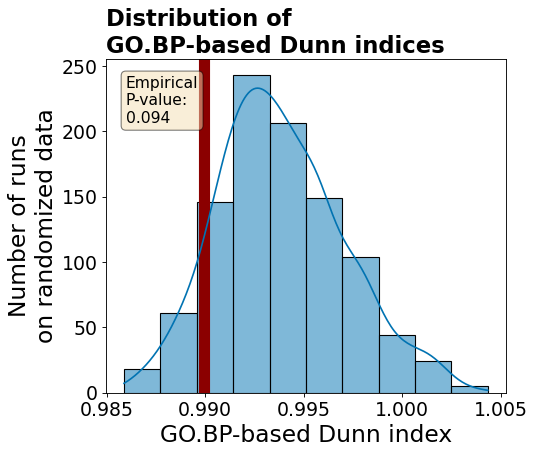

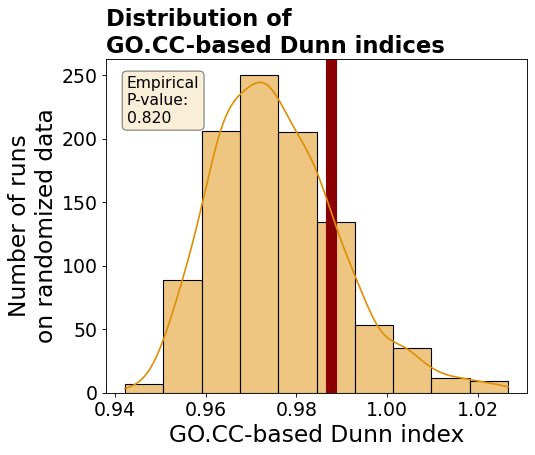

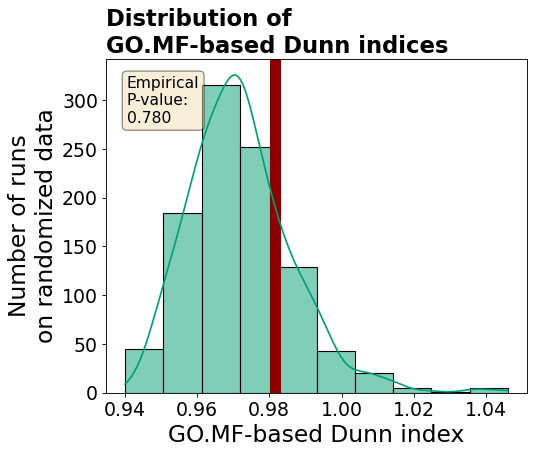

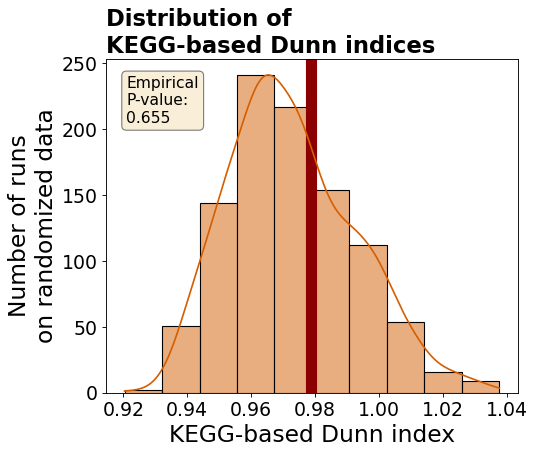

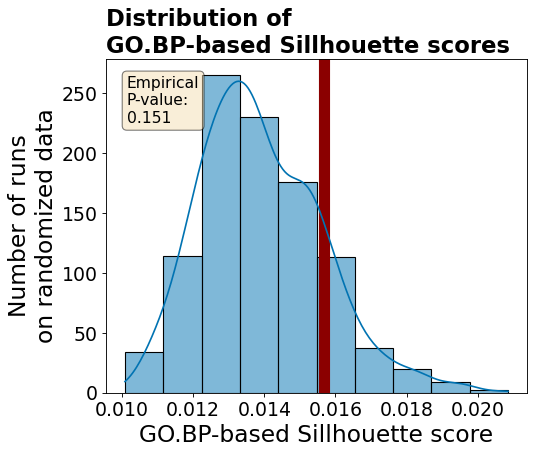

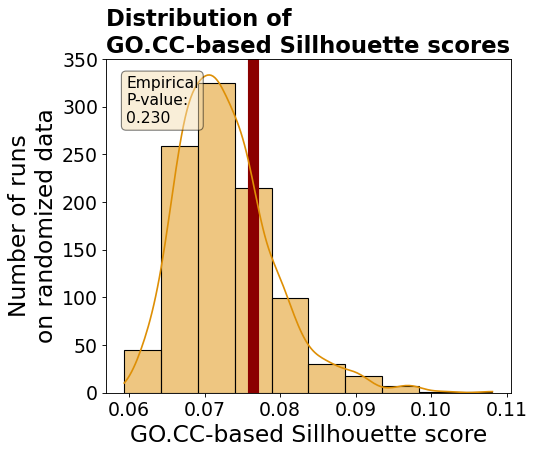

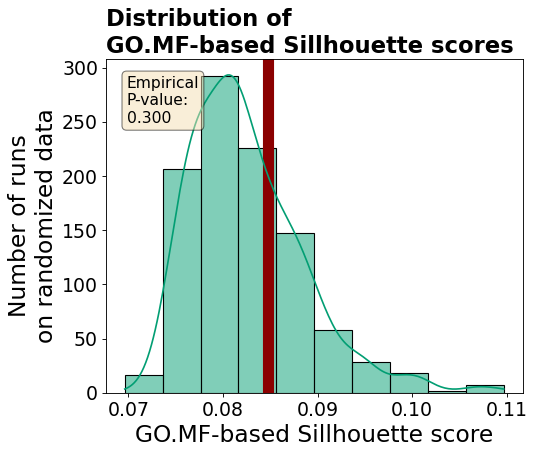

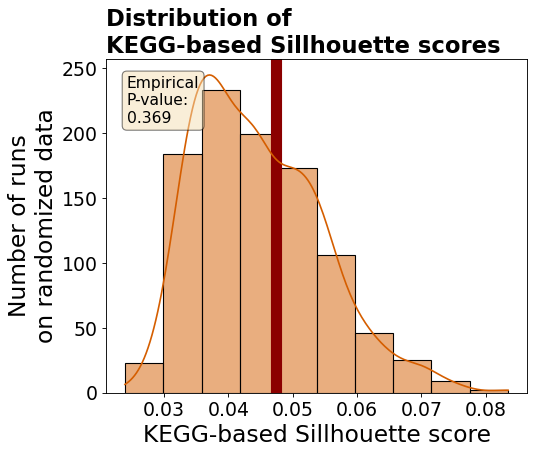

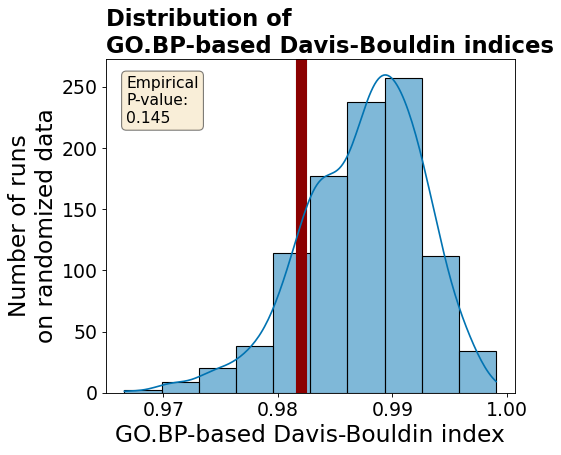

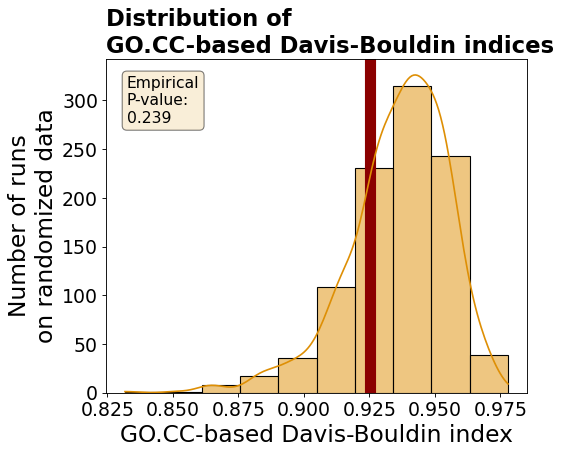

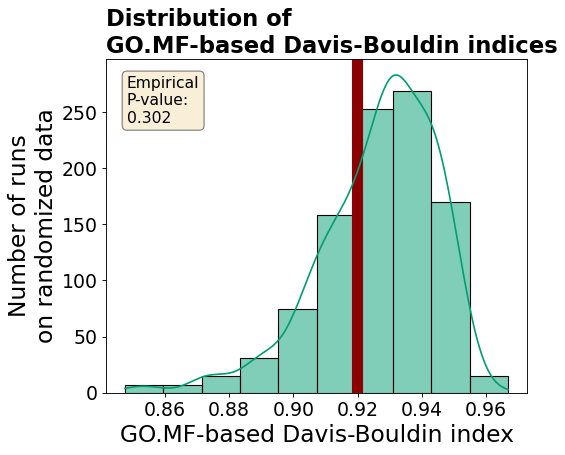

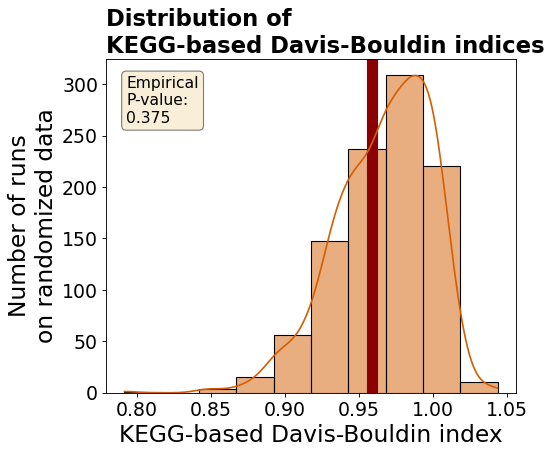

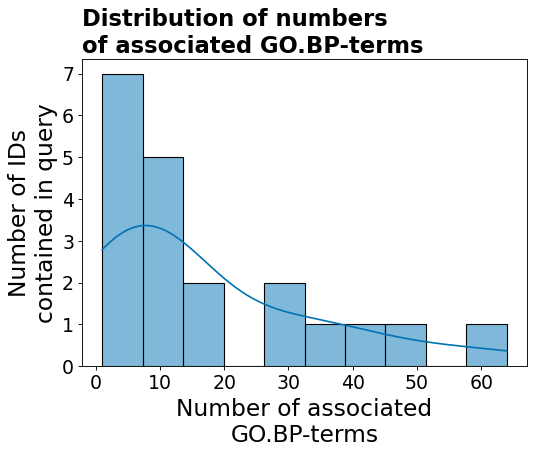

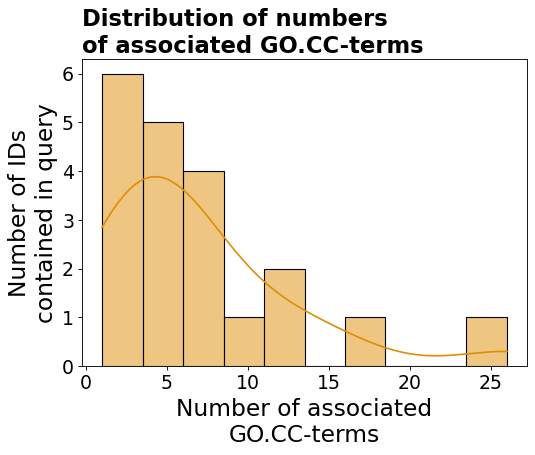

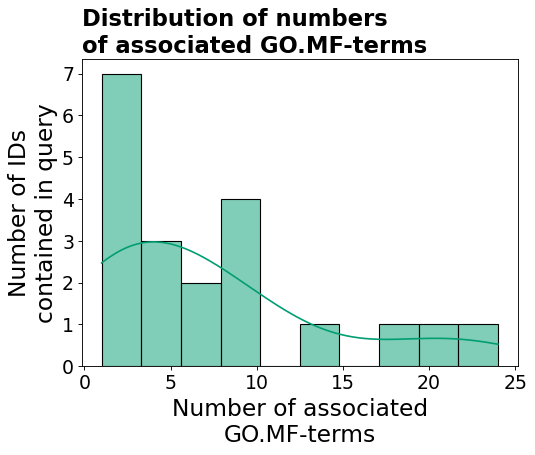

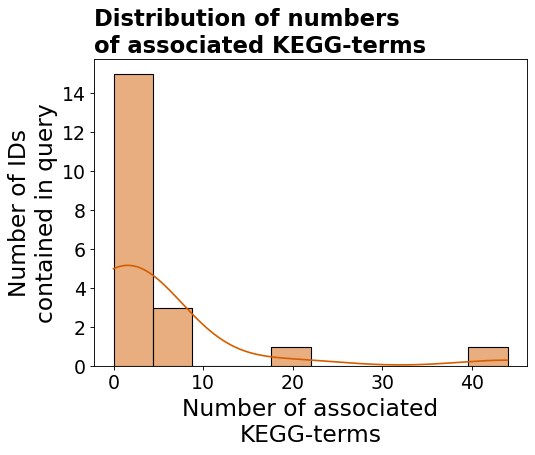

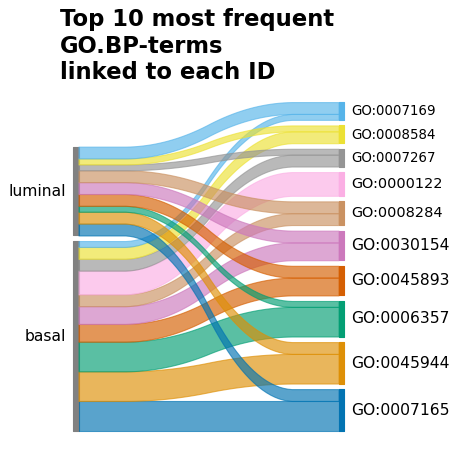

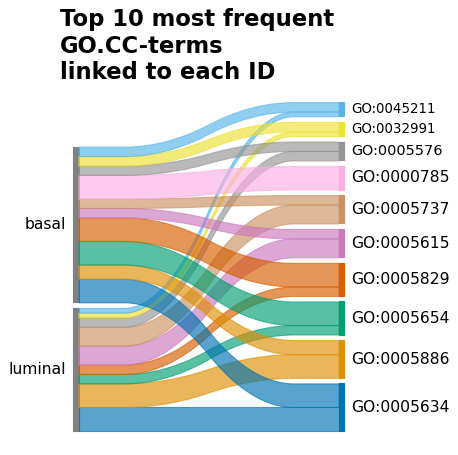

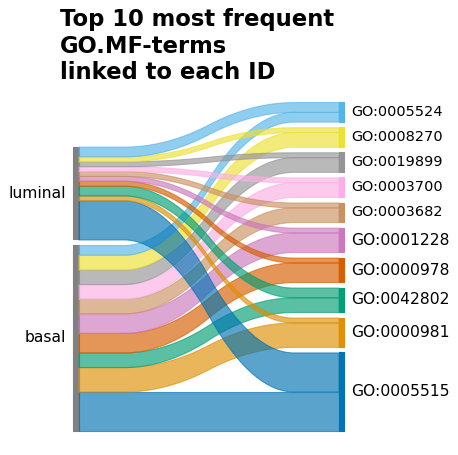

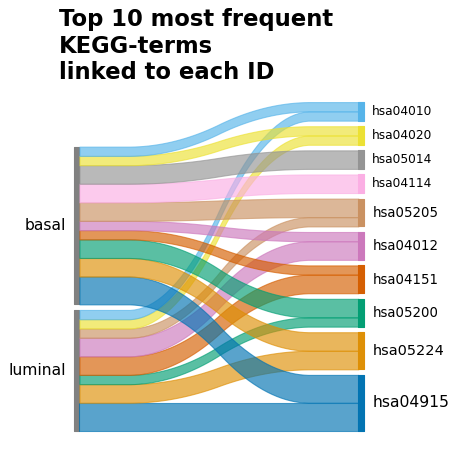

In [10]:
create_extended_plots(results=results, mode=mode, tar=tar_cluster, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Disease Cluster

### Set input parameters

#### Required input

In [11]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_disease_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "ICD-10"
mode = "clustering"

#### Optional input (Default parameters are set)

In [12]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_cluster/" 
verbose=True # printing additional information during the run
prefix="cluster_disease_ICD-10_complete"

### Run script

In [13]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2510.40MB] Check for proper setup ...
[00:00:00|2510.40MB] Starting validation ...
[00:00:00|2510.40MB] Load mappings for input into cache ...
[00:00:02|2509.55MB] Load distances for input into cache ...
[00:00:03|2725.97MB] Load input data ...
[00:00:03|2725.97MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:03|2727.52MB] Validation of random runs ...
[00:08:49|2728.29MB] Calculating p-values ...
[00:08:49|2728.29MB] Finished validation


### Inspect results

Check all P-values

In [14]:
pd.DataFrame(results["p_values"]['values'])

DI-based  SS-based  DBI-based
related_genes     0.512488  0.017982   0.738262
related_variants  0.966034  0.001998   0.537463
KEGG              0.938062  0.903097   0.021978

Check validation values of input cluster

In [15]:
pd.DataFrame(results["input_values"]['values'])

DI-based  SS-based  DBI-based
related_genes    -7.332896  3.787885  19.701737
related_variants  0.509827  4.524287   9.950938
KEGG              0.423433 -0.726466   0.714666

### Save results

#### Save full results as json and upper two tables as csv

In [17]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

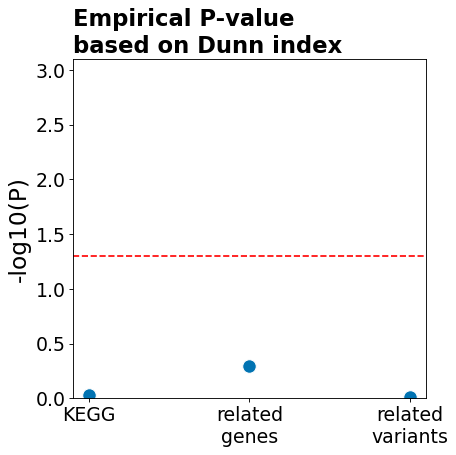

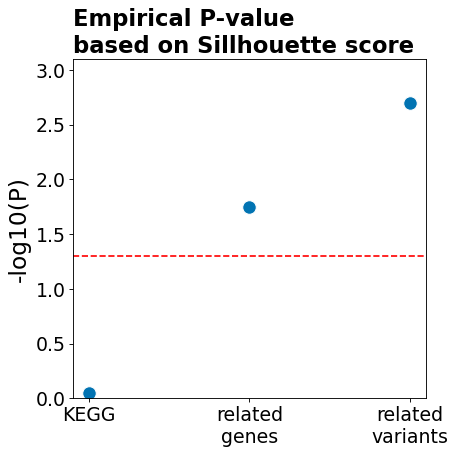

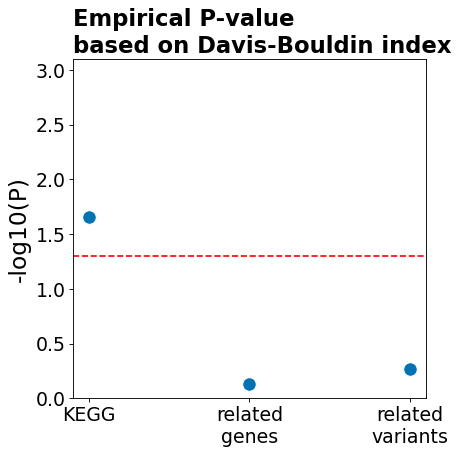

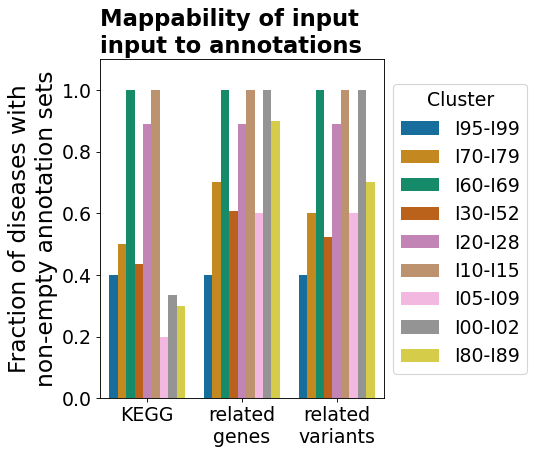

In [18]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Extended plots can show more information about the p-values with distribution plots of the relevance scores of the random runs, and about the mappability with distribution plots showing the number of assigned terms per ID and a sankey plot linking the top 10 terms to the respective ids or clusters.

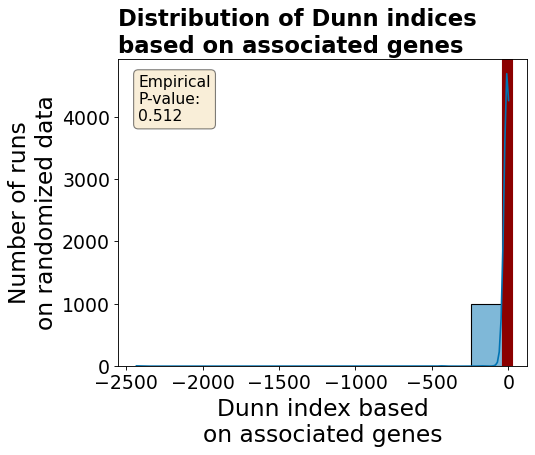

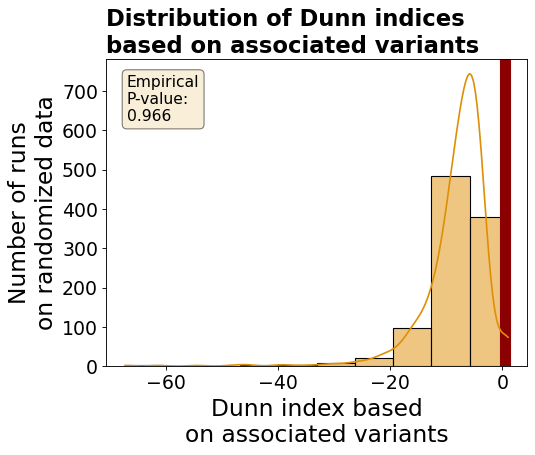

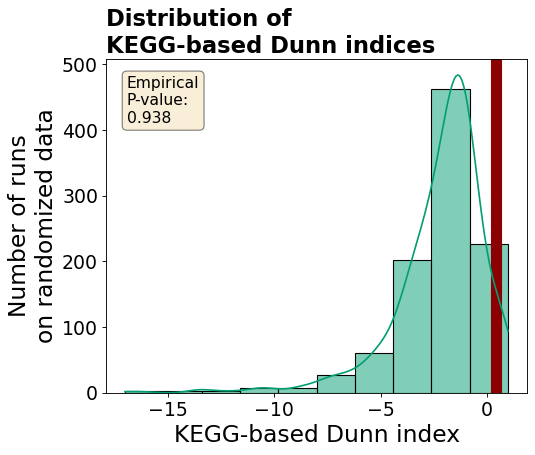

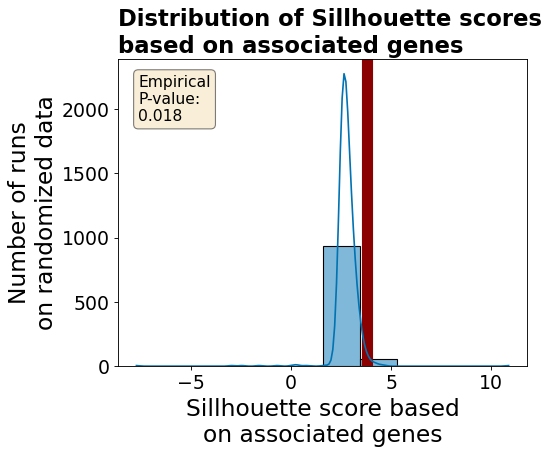

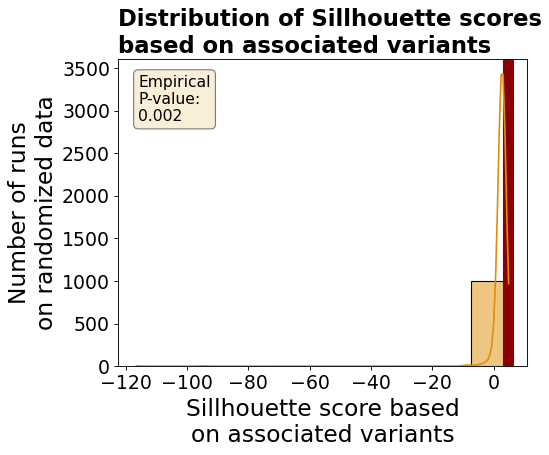

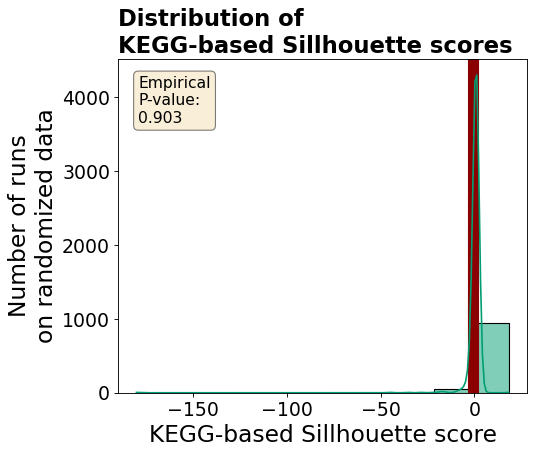

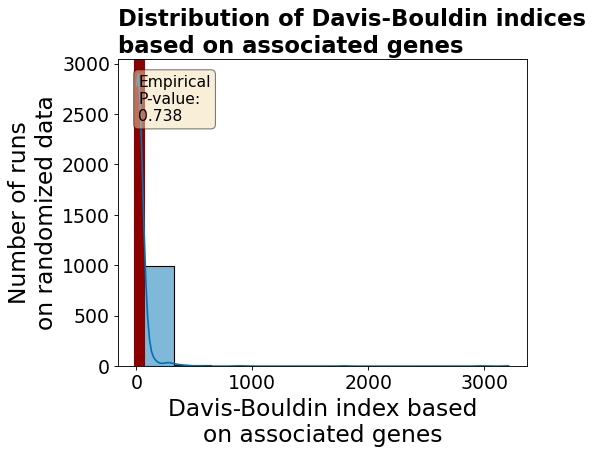

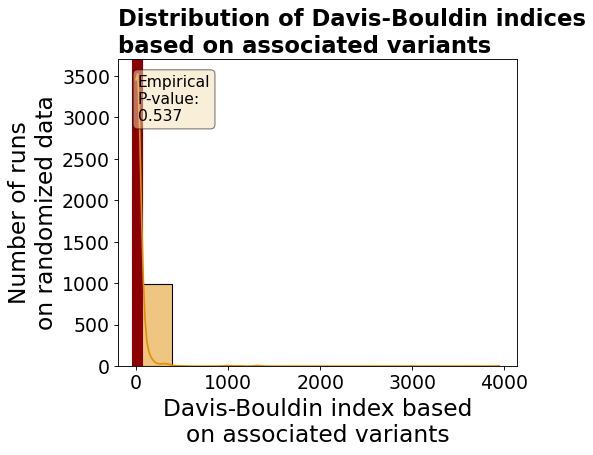

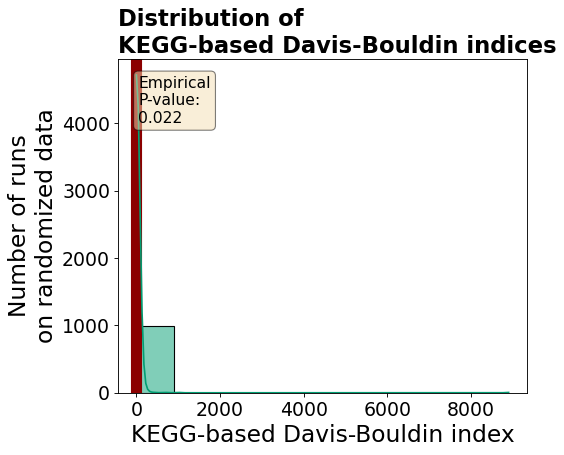

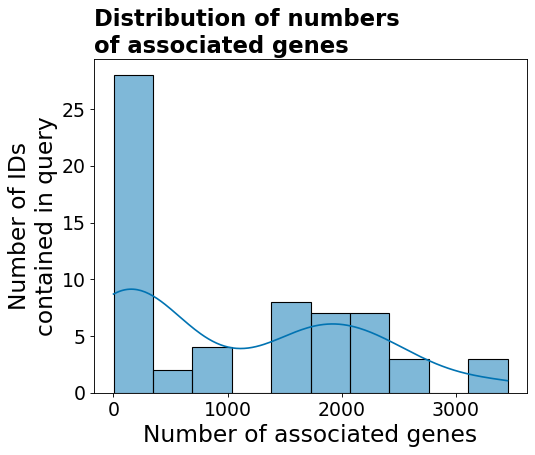

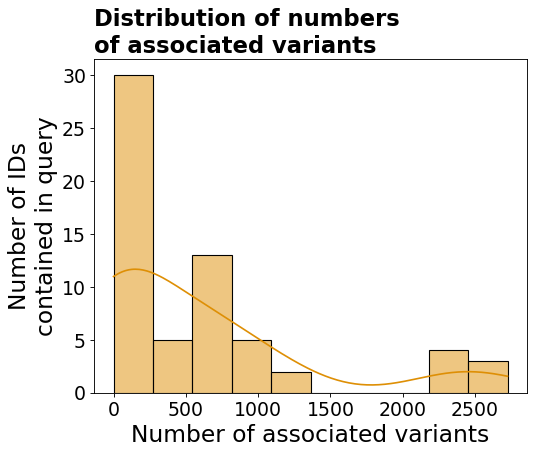

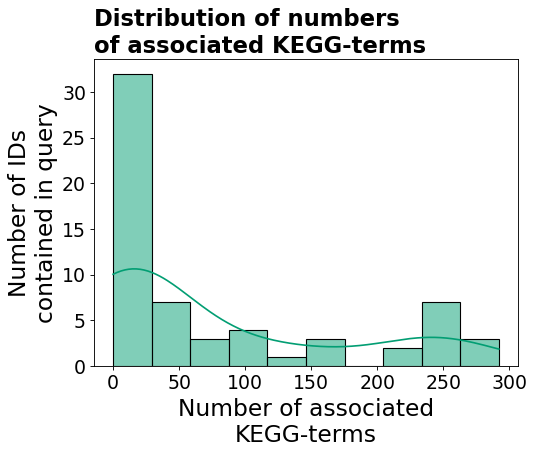

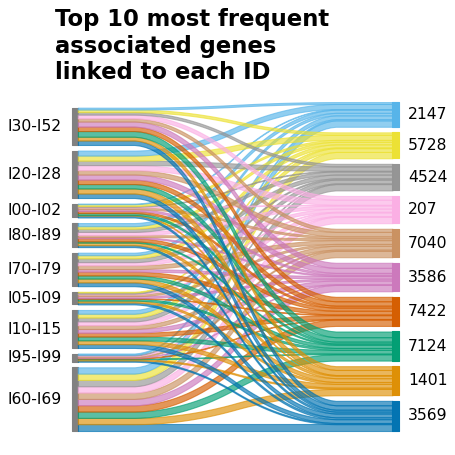

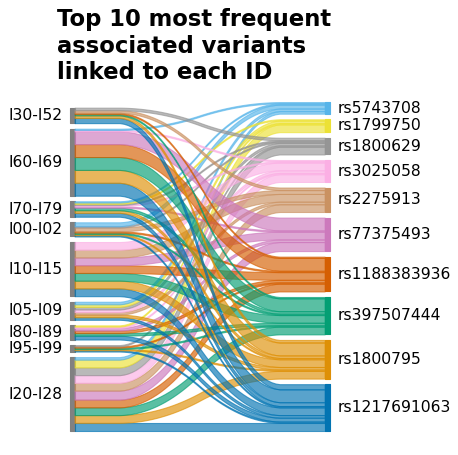

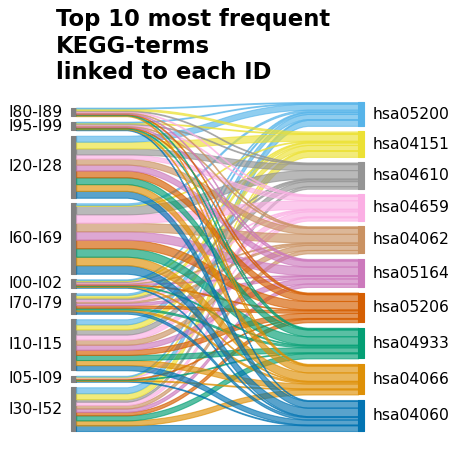

In [19]:
create_extended_plots(results=results, mode=mode, tar=tar_cluster, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Set itself

Validate a set by reference, either reference set or id, or reference-free. Two background models can be used. 

## Disease Set

### Set input parameters

#### Required input

In [20]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_disease_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "mesh"
mode = "set"

#### Optional input (Default parameters are set)

In [21]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_set/" 
verbose=True # printing additional information during the run
prefix="disease_set"

### Run script

In [22]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2737.40MB] Check for proper setup ...
[00:00:00|2737.40MB] Starting validation ...
[00:00:00|2737.40MB] Load mappings for input into cache ...
[00:00:02|2791.33MB] Load distances for input into cache ...
[00:00:03|2775.18MB] Validation of input ...
[00:00:03|2775.18MB] Validation of random runs ...
[00:02:00|2728.71MB] Calculating p-values ...
[00:02:00|2730.28MB] Finished validation


### Inspect results

Check all P-values

In [23]:
pd.DataFrame(results["p_values"]['values'])

JI-based
KEGG              0.000999
related_genes     0.000999
related_variants  0.001998

Check validation values of input cluster

In [24]:
pd.DataFrame(results["input_values"]['values'])

JI-based
KEGG              0.443860
related_genes     0.203047
related_variants  0.031845

### Save results

#### Save full results as json and upper two tables as csv

In [25]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

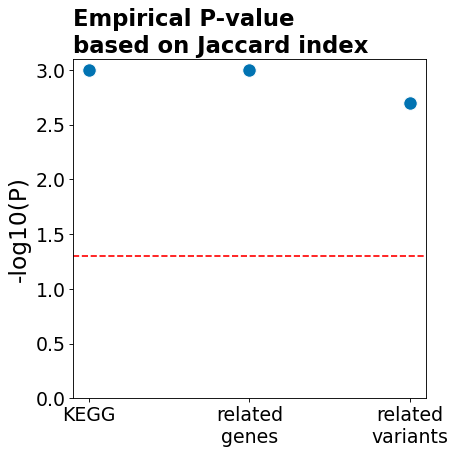

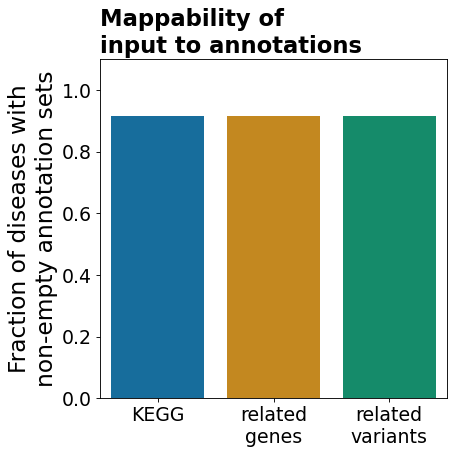

In [26]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Extended plots can show more information about the p-values with distribution plots of the relevance scores of the random runs, and about the mappability with distribution plots showing the number of assigned terms per ID and a sankey plot linking the top 10 terms to the respective ids or clusters.

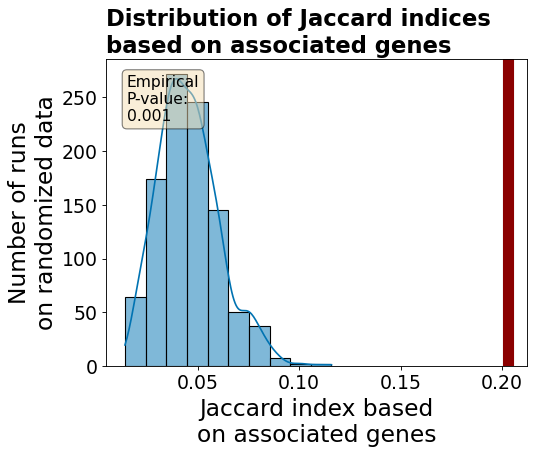

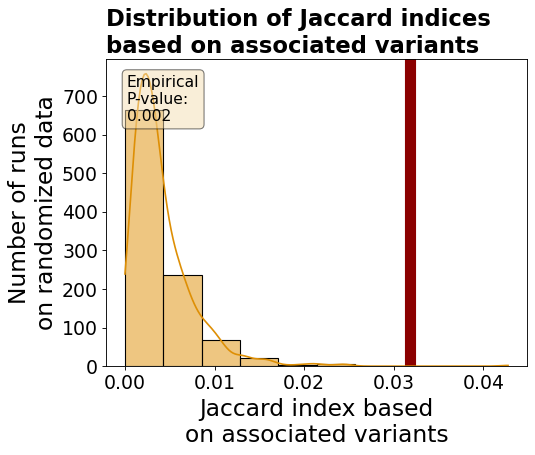

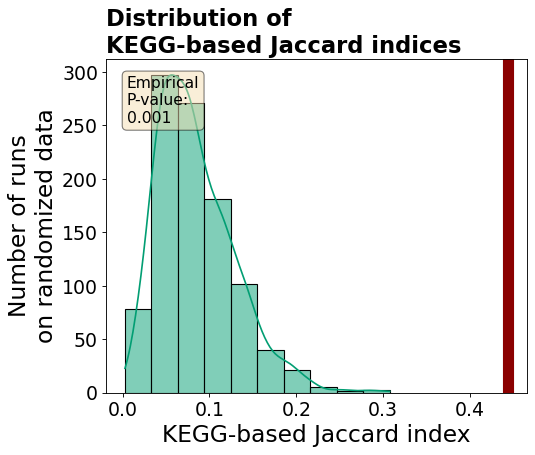

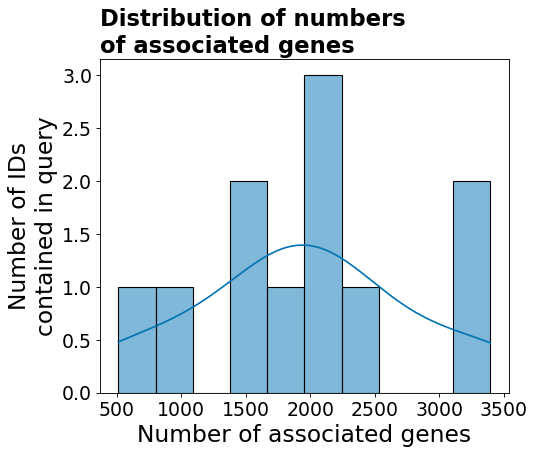

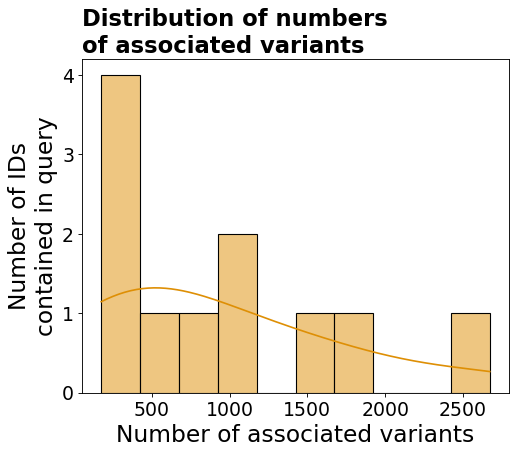

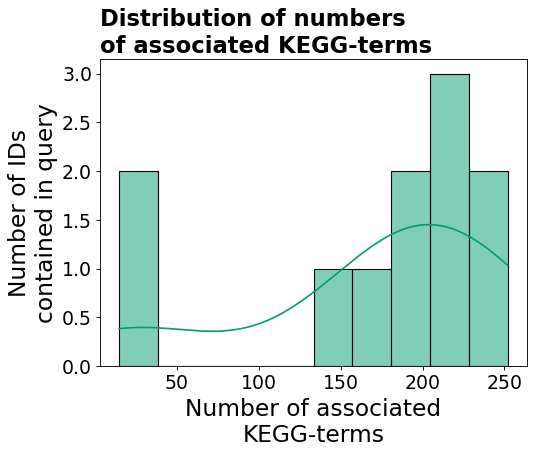

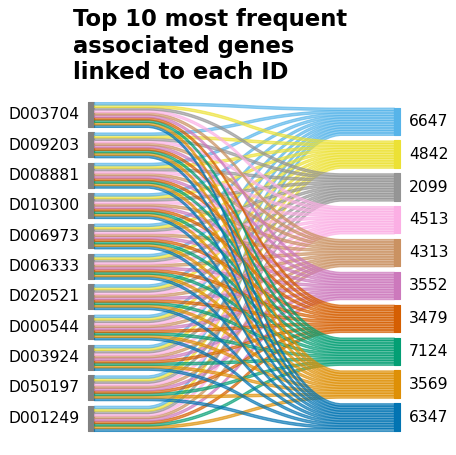

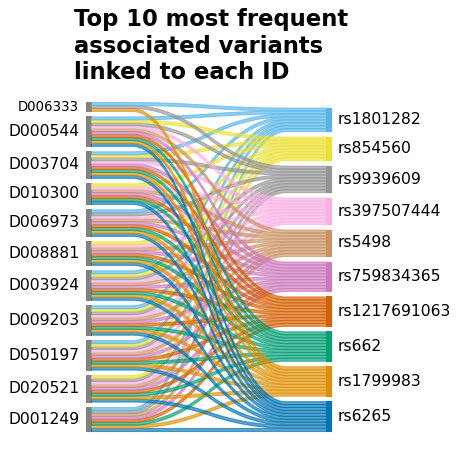

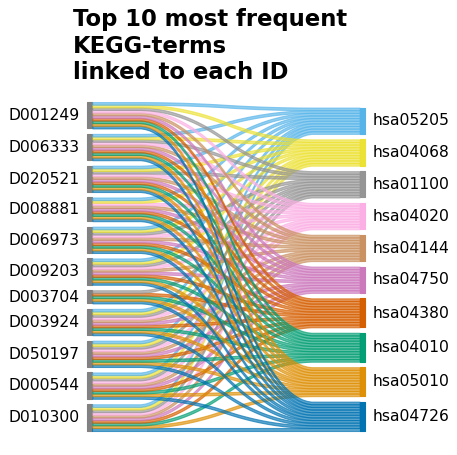

In [27]:
create_extended_plots(results=results, mode=mode, tar=tar_cluster, out_dir=out_dir, prefix=prefix)

## Gene Set

### Set input parameters

#### Required input

In [28]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_gene_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "symbol"
ref_set = pd.read_csv("input/reference_gene_set.txt", header=None, sep="\t", dtype=str)[0]
ref_id_type = "symbol"
mode = "set-set"

#### Optional input (Default parameters are set)

In [29]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
enriched=True

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_set/" 
verbose=True # printing additional information during the run
prefix="gene_set"

### Run script

In [30]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched, 
                            distance=distance_measure)

[00:00:00|2742.44MB] Check for proper setup ...
[00:00:00|2742.44MB] Starting validation ...
[00:00:00|2742.44MB] Load mappings for input into cache ...
[00:00:19|2735.35MB] Validation of input ...
[00:00:19|2735.35MB] Validation of random runs ...
[00:02:15|2729.06MB] Calculating p-values ...
[00:02:15|2729.06MB] Finished validation


### Inspect results

Check all P-values

In [31]:
pd.DataFrame(results["p_values"]['values'])

JI-based
GO.BP  0.000999
GO.CC  0.000999
GO.MF  0.015984
KEGG   1.000000

Check validation values of input cluster

In [32]:
pd.DataFrame(results["input_values"]['values'])

JI-based
GO.BP    0.625
GO.CC     0.65
GO.MF     0.35
KEGG       0.0

### Save results

#### Save full results as json and upper two tables as csv

In [33]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

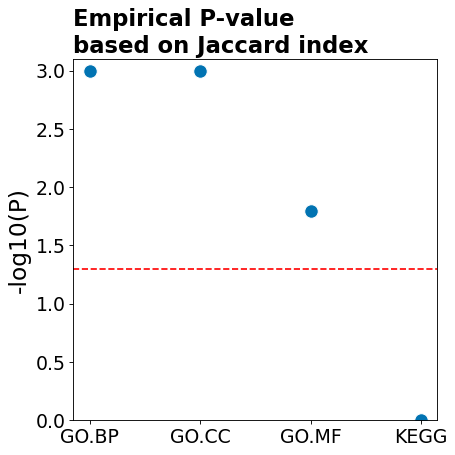

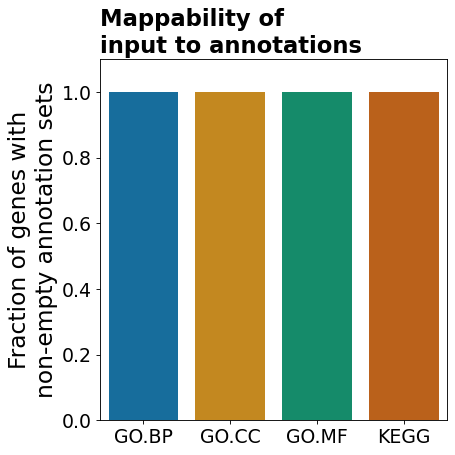

In [34]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Extended plots can show more information about the p-values with distribution plots of the relevance scores of the random runs, and about the mappability with distribution plots showing the number of assigned terms per ID and a sankey plot linking the top 10 terms to the respective ids or clusters.

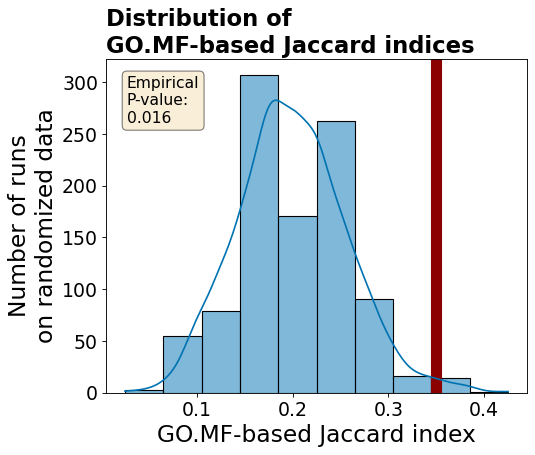

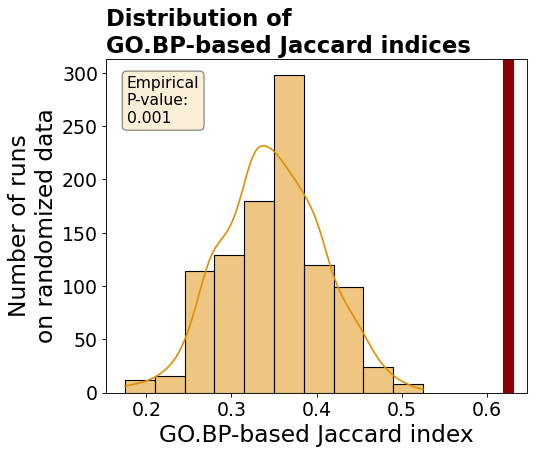

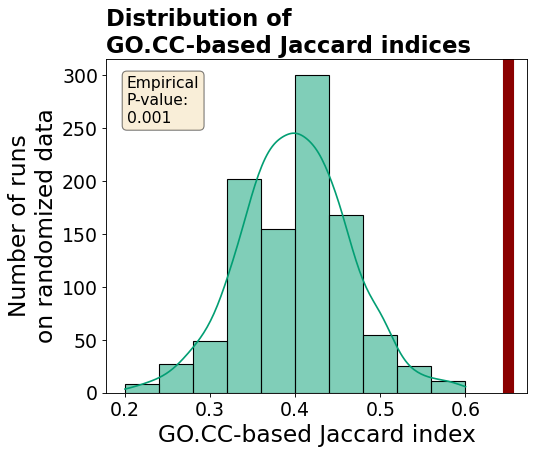

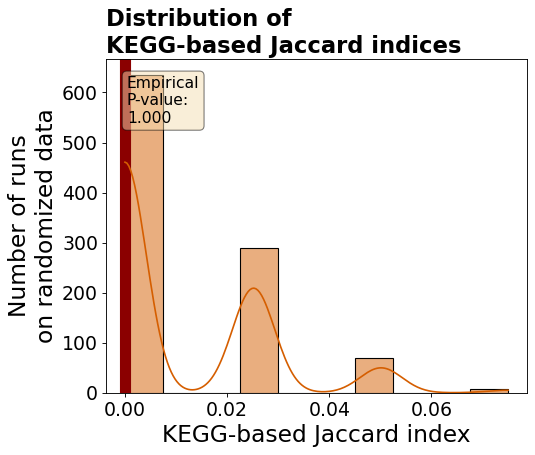

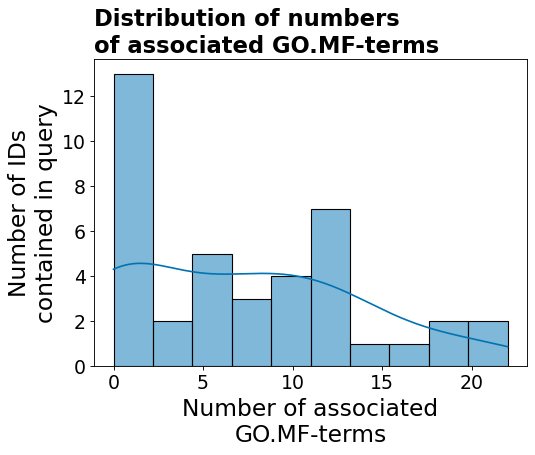

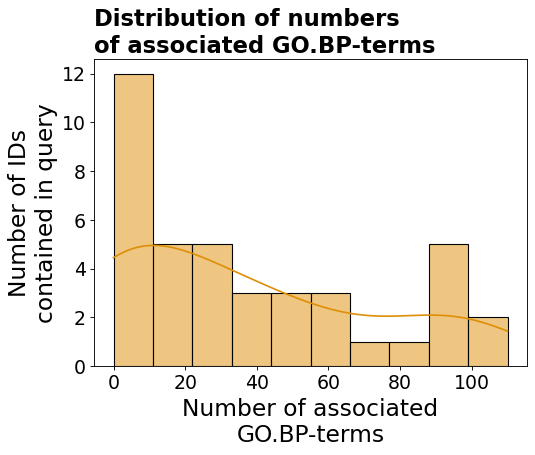

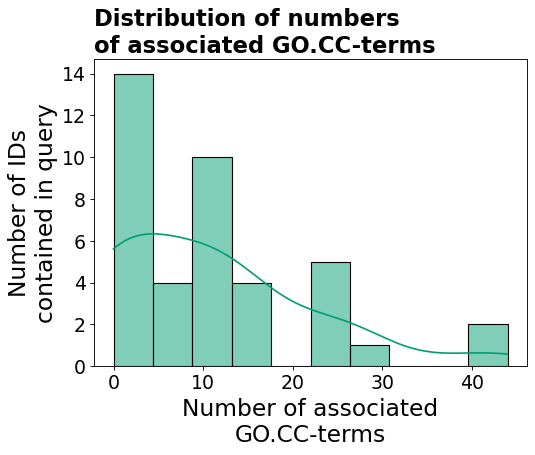

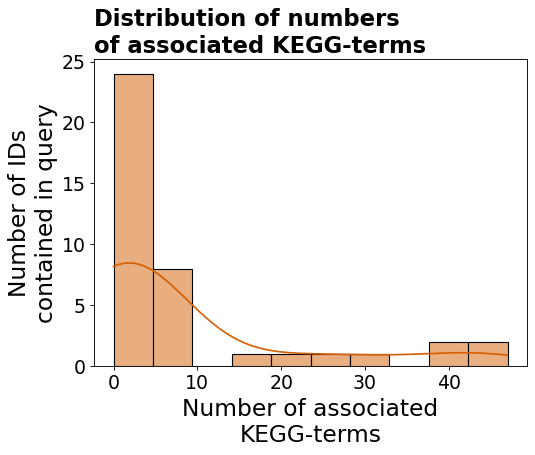

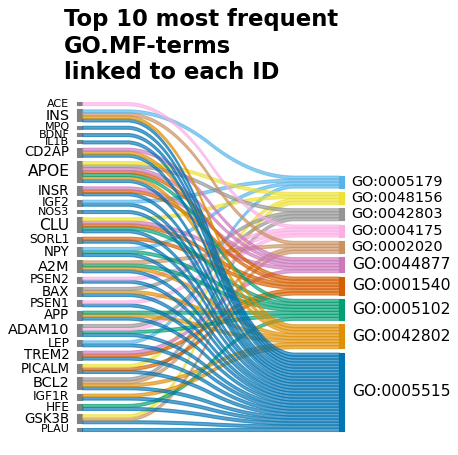

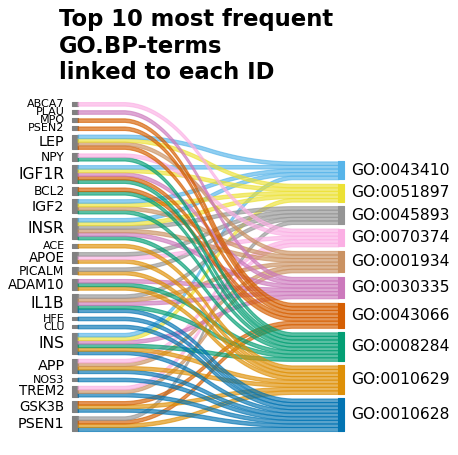

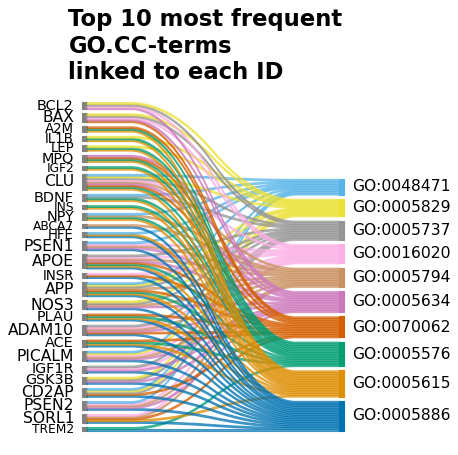

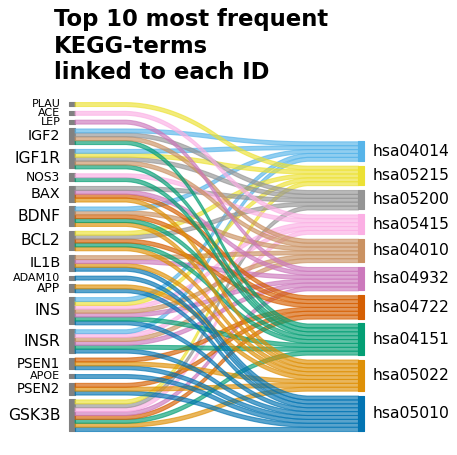

In [35]:
create_extended_plots(results=results, mode=mode, tar=tar_cluster, out_dir=out_dir, prefix=prefix)

## Gene Subnetwork

### Subnetwork input parameters

#### Required input

In [36]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_gene_subnetwork.txt", header=None, sep=",", dtype=str)[0]
tar_id_type = "symbol"
network_data = {"network_file":"input/gene_network.graphml", "prop_name":"name", "id_type":"symbol"}
mode = "subnetwork"

#### Optional input (Default parameters are set)

In [37]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="network" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
enriched=True

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_network/" 
verbose=True # printing additional information during the run
prefix="gene_network"

### Run script

In [38]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched, 
                            distance=distance_measure, network_data=network_data)

[00:00:00|2741.59MB] Check for proper setup ...
[00:00:00|2741.59MB] Starting validation ...
[00:00:00|2741.59MB] Load mappings for input into cache ...
[00:00:02|2740.34MB] Load distances for input into cache ...
[00:00:17|2782.84MB] Validation of input ...
Missing values for pathway.kegg :8/36
[00:00:17|2782.84MB] Validation of random runs ...
[00:02:13|2801.54MB] Calculating p-values ...
[00:02:13|2801.82MB] Finished validation


### Inspect results

Check all P-values

In [39]:
pd.DataFrame(results["p_values"]['values'])

JI-based
GO.BP  0.077922
GO.CC  0.506494
GO.MF  0.444555
KEGG   0.167832

Check validation values of input cluster

In [40]:
pd.DataFrame(results["input_values"]['values'])

JI-based
GO.BP  0.026896
GO.CC  0.118837
GO.MF  0.115702
KEGG   0.031394

### Save results

#### Save full results as json and upper two tables as csv

In [41]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

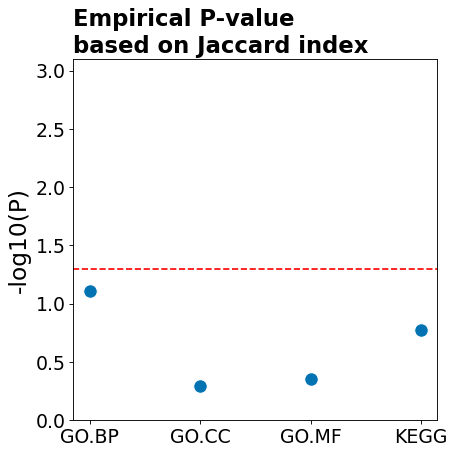

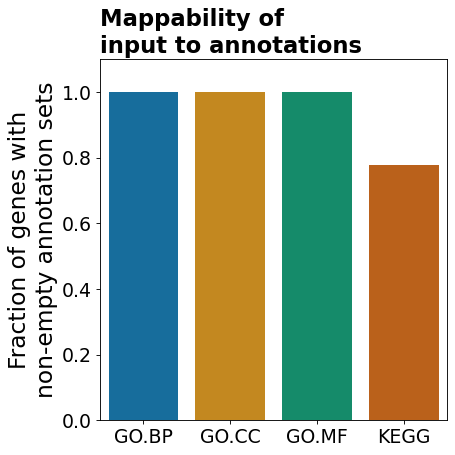

In [42]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Extended plots can show more information about the p-values with distribution plots of the relevance scores of the random runs, and about the mappability with distribution plots showing the number of assigned terms per ID and a sankey plot linking the top 10 terms to the respective ids or clusters.

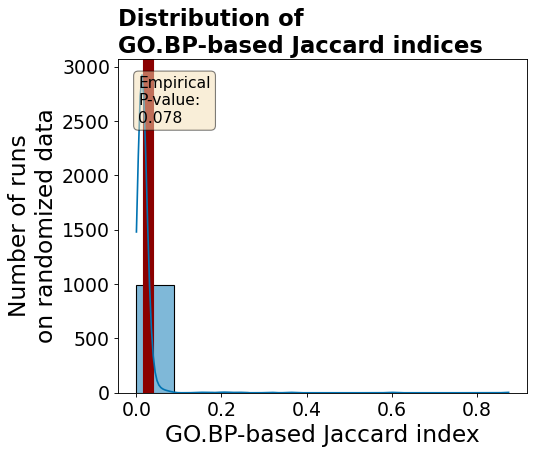

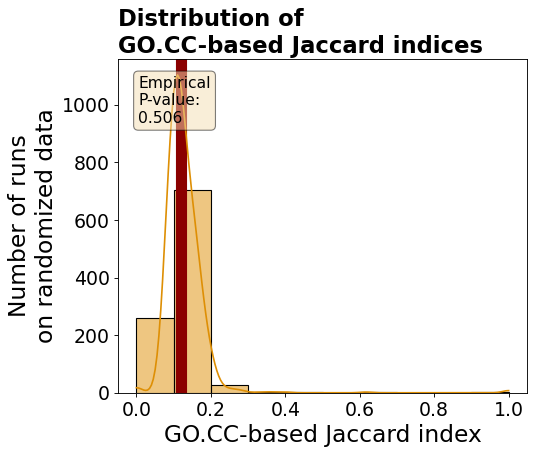

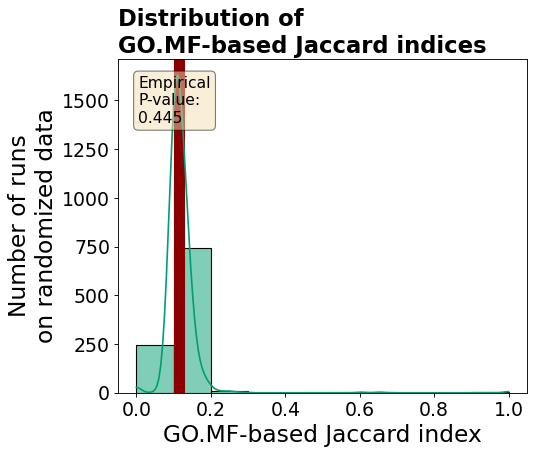

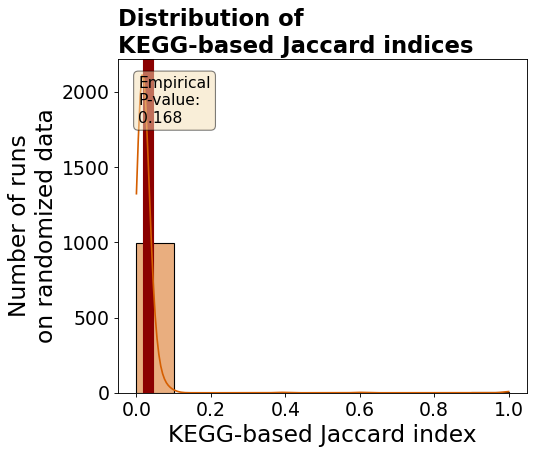

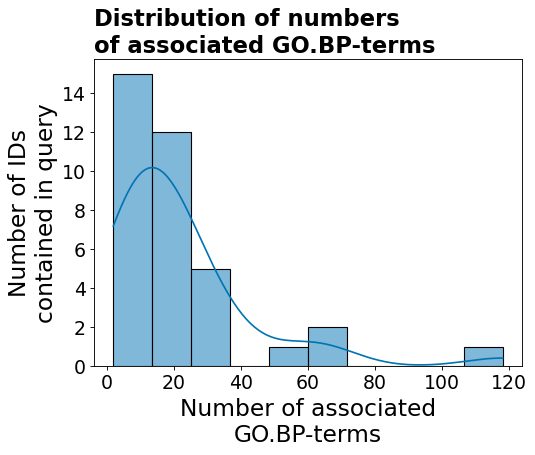

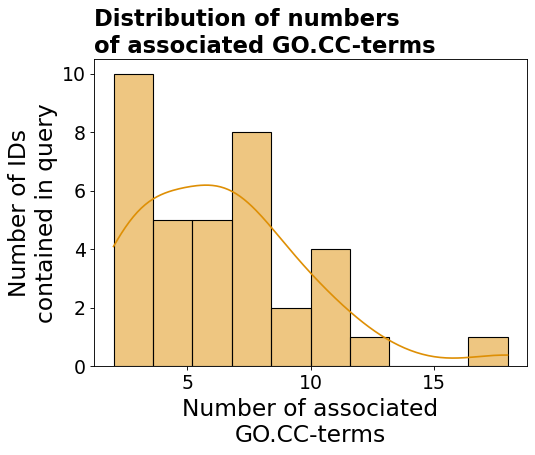

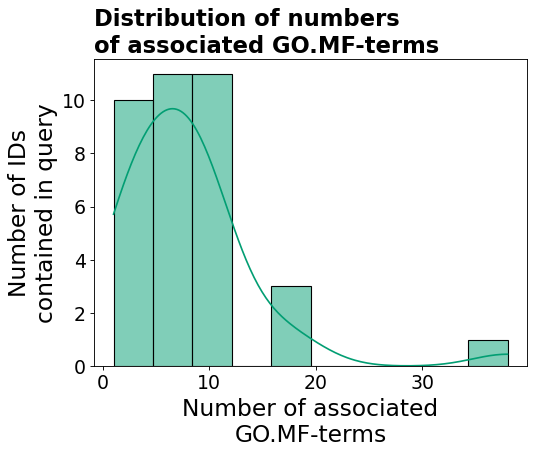

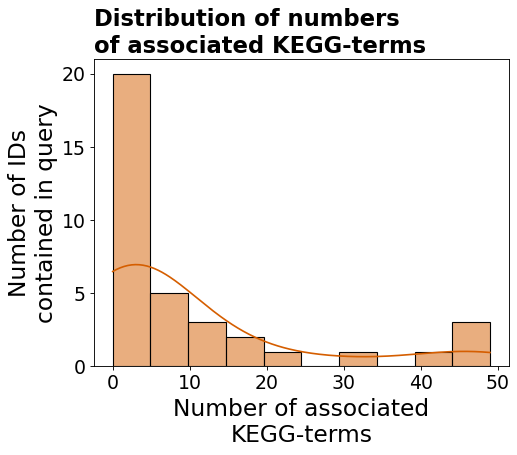

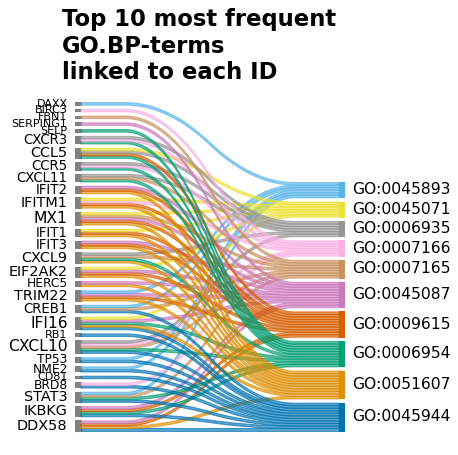

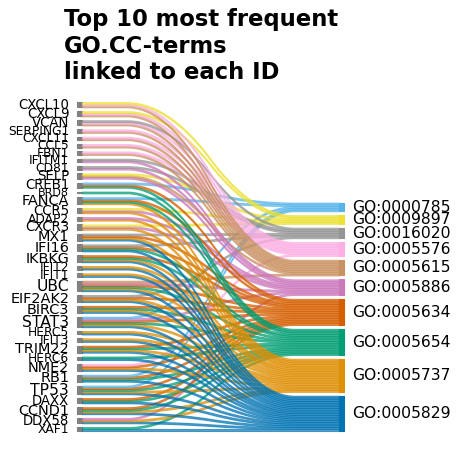

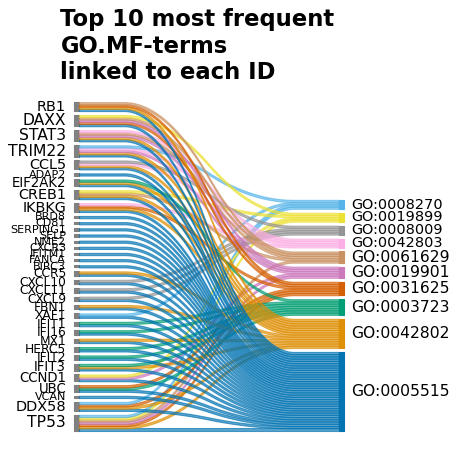

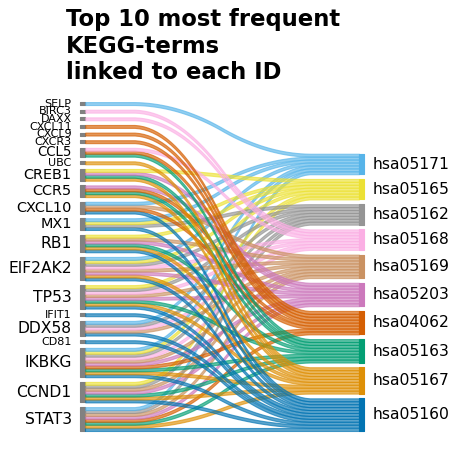

In [43]:
create_extended_plots(results=results, mode=mode, tar=tar_cluster, out_dir=out_dir, prefix=prefix)